## Innstall package

VS Code --> Terminal > New Terminal

python -m venv cnn-ws-venv

cnn-ws-venv\Scripts\activate

pip list 

pip install ipykernel

pip install numpy tensorflow matplotlib opencv-python 

pip install scipy

pip install tensorflow

## แปลงจาก .md => .ipynb

ติดตั้ง jupytext (ถ้ายังไม่มี): เปิด Terminal หรือ Command Prompt แล้วรัน:

pip install jupytext

สั่งแปลงไฟล์: ไปที่โฟลเดอร์ที่มีไฟล์ 01-image-filter.md ของคุณ แล้วรันคำสั่งนี้:

jupytext --to notebook 01-image-filter.md

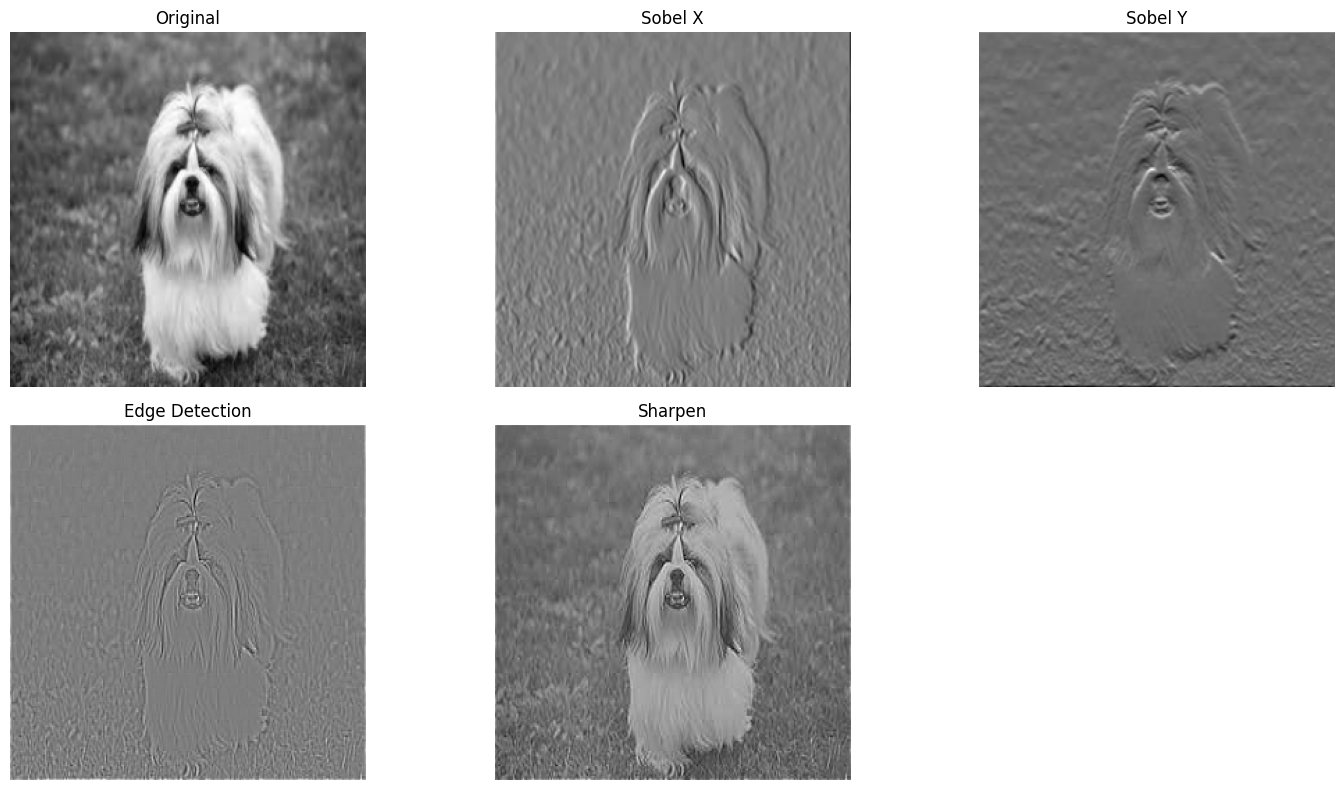

In [3]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
    
# 1. Load the image in grayscale and resize to 256x256
img = cv2.imread('dog2.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
img_tensor = tf.constant(img, dtype=tf.float32)
img_tensor = tf.reshape(img_tensor, [1, 256, 256, 1])  # Shape: [batch, height, width, channel]

# 2. Define filter function
def get_filter(kernel):
    kernel = np.array(kernel, dtype=np.float32)
    kernel = kernel.reshape((3, 3, 1, 1))  # Shape: [filter_height, filter_width, in_channels, out_channels]
    return tf.constant(kernel)

# Sample filters
sobel_x = get_filter([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])  # Sobel filter for horizontal edges

sobel_y = get_filter([[-1, -2, -1],
                      [ 0,  0,  0],
                      [ 1,  2,  1]])  # Sobel filter for vertical edges

edge = get_filter([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])  # Edge detection filter (Laplacian)

sharpen = get_filter([[ 0, -1,  0],
                      [-1,  5, -1],
                      [ 0, -1,  0]])  # Sharpening filter

# 3. Convolution function
def apply_filter(img_tensor, kernel):
    return tf.nn.conv2d(img_tensor, kernel, strides=1, padding='SAME')

# 4. Apply filters to the image
filtered_images = [
    img,  # Original image
    apply_filter(img_tensor, sobel_x)[0, :, :, 0].numpy(),     # Sobel X
    apply_filter(img_tensor, sobel_y)[0, :, :, 0].numpy(),     # Sobel Y
    apply_filter(img_tensor, edge)[0, :, :, 0].numpy(),        # Edge detection
    apply_filter(img_tensor, sharpen)[0, ..., 0].numpy()       # Sharpened image
]

titles = ['Original', 'Sobel X', 'Sobel Y', 'Edge Detection', 'Sharpen']

# 5. Display all images
plt.figure(figsize=(15, 8))
for i, (img, title) in enumerate(zip(filtered_images, titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()




![png](01-image-filter_files/01-image-filter_1_0.png)
    



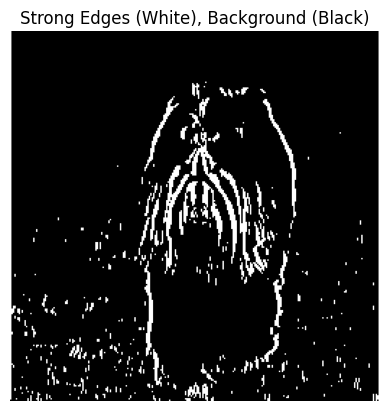

True

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# # Assume 'edge' is the output from a Sobel filter
img_edge = apply_filter(img_tensor, sobel_x)[0, :, :, 0].numpy()

# 1. Take absolute values (to ensure positive edge values)
edge_abs = np.abs(img_edge)

# 2. Normalize to the range 0–255
edge_norm = (edge_abs / edge_abs.max()) * 255
edge_norm = edge_norm.astype(np.uint8)

# 3. Apply threshold to keep only strong edges
threshold = 50  # You can adjust this value
edge_thresh = np.where(edge_norm > threshold, 255, 0).astype(np.uint8)

# 4. Display the result
plt.imshow(edge_thresh, cmap='gray')
plt.title('Strong Edges (White), Background (Black)')
plt.axis('off')
plt.show()

# 5. Save the processed image
cv2.imwrite('strong_edges.jpg', edge_thresh)


![png](01-image-filter_files/01-image-filter_2_0.png)
    





    True



